**Amirreza Hosseini** *9820363* <br>
HW2

In [1]:
from random import random
import pandas as pd
import torch
import numpy as np

C:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


*reading the data*

In [2]:
df = pd.read_csv('.\\Ozone Level Detection.data', sep=',', header=None)

*handling the missing values*

In [3]:
#change every ? to random number
df.replace('?', random(), inplace=True)

*K fold cross validation* <br>
partition df into 3 parts <br>
train, test, validation <br>
K=3 <br>
70% for train <br>
20% for test <br>
10% for validation

In [4]:
train = df.iloc[:int(len(df)*0.7)]
test = df.iloc[int(len(df)*0.7):int(len(df)*0.9)]
validation = df.iloc[int(len(df)*0.9):]

*extracting x & y from data* <br>
also remove the date filed from data

In [5]:
y_train=train.iloc[:,73:74]
x_train=train.iloc[:, 1:-1]

y_test=test.iloc[:,73:74]
x_test=test.iloc[:, 1:-1]

y_val=validation.iloc[:,73:74]
x_val=validation.iloc[:, 1:-1]


*convert the type of the data* <br>
from object to float <br>
for tensor parameter

In [6]:
#convertion for x_test
x_test=x_test.to_numpy()
x_test=np.vstack(x_test).astype(np.float32) 
x_test=torch.from_numpy(x_test)

#also do convertion for y_test
y_test=y_test.to_numpy()
y_test=np.vstack(y_test).astype(np.float32)
y_test=torch.from_numpy(y_test)

#also do convertion for x_train
x_train=x_train.to_numpy()
x_train=np.vstack(x_train).astype(np.float32)
x_train=torch.from_numpy(x_train)

#also do convertion for y_train
y_train=y_train.to_numpy()  
y_train=np.vstack(y_train).astype(np.float32)
y_train=torch.from_numpy(y_train)

#also do convertion for x_val
x_val=x_val.to_numpy()
x_val=np.vstack(x_val).astype(np.float32)
x_val=torch.from_numpy(x_val)

#also do convertion for y_val
y_val=y_val.to_numpy()
y_val=np.vstack(y_val).astype(np.float32)
y_val=torch.from_numpy(y_val)


print(y_train.shape)
print(x_train.shape)

torch.Size([1775, 1])
torch.Size([1775, 72])


**initial the neural network model** <br>
4 fullly connected hidden layers <br>
first activation function is RelU and the others are Sigmoid
<br> showed in Forward function respectively..

In [7]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
            self.sigmoid = torch.nn.Sigmoid()
            self.fc3 = torch.nn.Linear(self.hidden_size,self.hidden_size)
            self.sigmoid = torch.nn.Sigmoid()
            self.fc4 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            hidden = self.fc2(relu)
            relu = self.relu(hidden)
            hidden=self.fc3(relu)
            relu = self.relu(hidden)
            output = self.fc4(relu)
            output = self.sigmoid(output)
            return output

*create model instance* <br>
loss function: BCE <br>
optimizer: GD <br>
learning rate=0.01

In [16]:
model = Feedforward(72, 50)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
losses_list1 = []

*Go To Evaluation Mode* <br>
test the loss before training with evaluation datas

In [9]:
model.eval()
y_pred = model(x_val)
before_train = criterion(y_pred.squeeze(),y_val.squeeze()) 
print('Test loss before training' , before_train.item())

Test loss before training 0.7101112008094788


*Go To Training Mode*
for 70 epochs <br>
print the loss in every iteration

In [18]:
model.train()
epoch = 70
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train.squeeze())
    losses_list1.append(loss.item())
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 1.2613261938095093
Epoch 1: train loss: 1.2611732482910156
Epoch 2: train loss: 1.2405903339385986
Epoch 3: train loss: 0.6958646774291992
Epoch 4: train loss: 0.6958626508712769
Epoch 5: train loss: 0.695860743522644
Epoch 6: train loss: 0.6958587169647217
Epoch 7: train loss: 0.6958568096160889
Epoch 8: train loss: 0.6958547830581665
Epoch 9: train loss: 0.6958528161048889
Epoch 10: train loss: 0.6958509683609009
Epoch 11: train loss: 0.6958490014076233
Epoch 12: train loss: 0.6958471536636353
Epoch 13: train loss: 0.6958450675010681
Epoch 14: train loss: 0.6958432197570801
Epoch 15: train loss: 0.6958411931991577
Epoch 16: train loss: 0.6958394050598145
Epoch 17: train loss: 0.6958374977111816
Epoch 18: train loss: 0.6958355903625488
Epoch 19: train loss: 0.6958338022232056
Epoch 20: train loss: 0.6958318948745728
Epoch 21: train loss: 0.6958299875259399
Epoch 22: train loss: 0.6958280801773071
Epoch 23: train loss: 0.6958263516426086
Epoch 24: train loss: 0.695

*Go To Evaluation Mode* <br>
test the loss after training with test datas

In [19]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test.squeeze()) 
print('Test loss after Training' , after_train.item())
losses_list2 = []

Test loss after Training 0.6941480040550232


*calculate the delta of loss* <br>
before and after training

In [13]:
delta=after_train.item()-before_train.item()
#print absoluted difference
print('Absolute difference between before and after training: ', abs(delta))

Absolute difference between before and after training:  0.011317312717437744


*calculate Standard deviation and avrage* <br>
for test and validation data for new learning rate=0.09 <br>
and 20 epochs

In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.09)

model.train()
epoch = 20
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train.squeeze())
    losses_list2.append(loss.item())
   
    #print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()
    
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test.squeeze()) 
print('Test loss after Training' , after_train.item())

#print standard deviation of after_train and before_train
print('Standard deviation of after_train and before_train: ', np.std(after_train.item()+before_train.item()))

#print average of after_train and before_train
print('Average of after_train and before_train: ', np.mean(after_train.item()+before_train.item()))

Test loss after Training 0.6937658786773682
Standard deviation of after_train and before_train:  0.0
Average of after_train and before_train:  1.403877079486847


*find model overfitting or underfitting* <br>
if model overfitting then loss will be high <br>
if model underfitting then loss will be low <br>

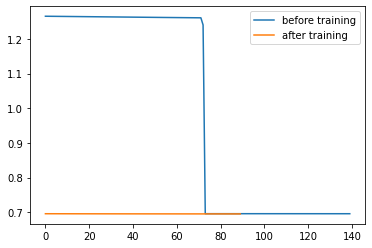

In [25]:
#plot losses_list1 and losses_list2 with labels
from matplotlib import pyplot as plt    
plt.plot(losses_list1, label='before training')
plt.plot(losses_list2, label='after training')
plt.legend()
plt.show()